Your Custom Dataset: https://universe.roboflow.com/iat355/hard-hat-worker-detection/dataset/4

In [1]:
!nvidia-smi

Thu Nov  7 04:24:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              48W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

**Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 15.4 MB/s eta 0:00:00


**Importing All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.1/235.7 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Download custom Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VByWHm7BVXSjOKbWE9V1")
project = rf.workspace("iat355").project("hard-hat-worker-detection")
version = project.version(4)
dataset = version.download("yolov11")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to hard-hat-worker-detection-4 in yolov11:: 100%|██████████| 13306/13306 [00:02<00:00, 6084.93it/s]


In [6]:
dataset.location

'/content/hard-hat-worker-detection-4'

**Train YOLO11 Model on my Custom Dataset**

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 63.2MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/hard-hat-worker-detection-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

**Examine Training Results**

Multiclass confustion matrix:

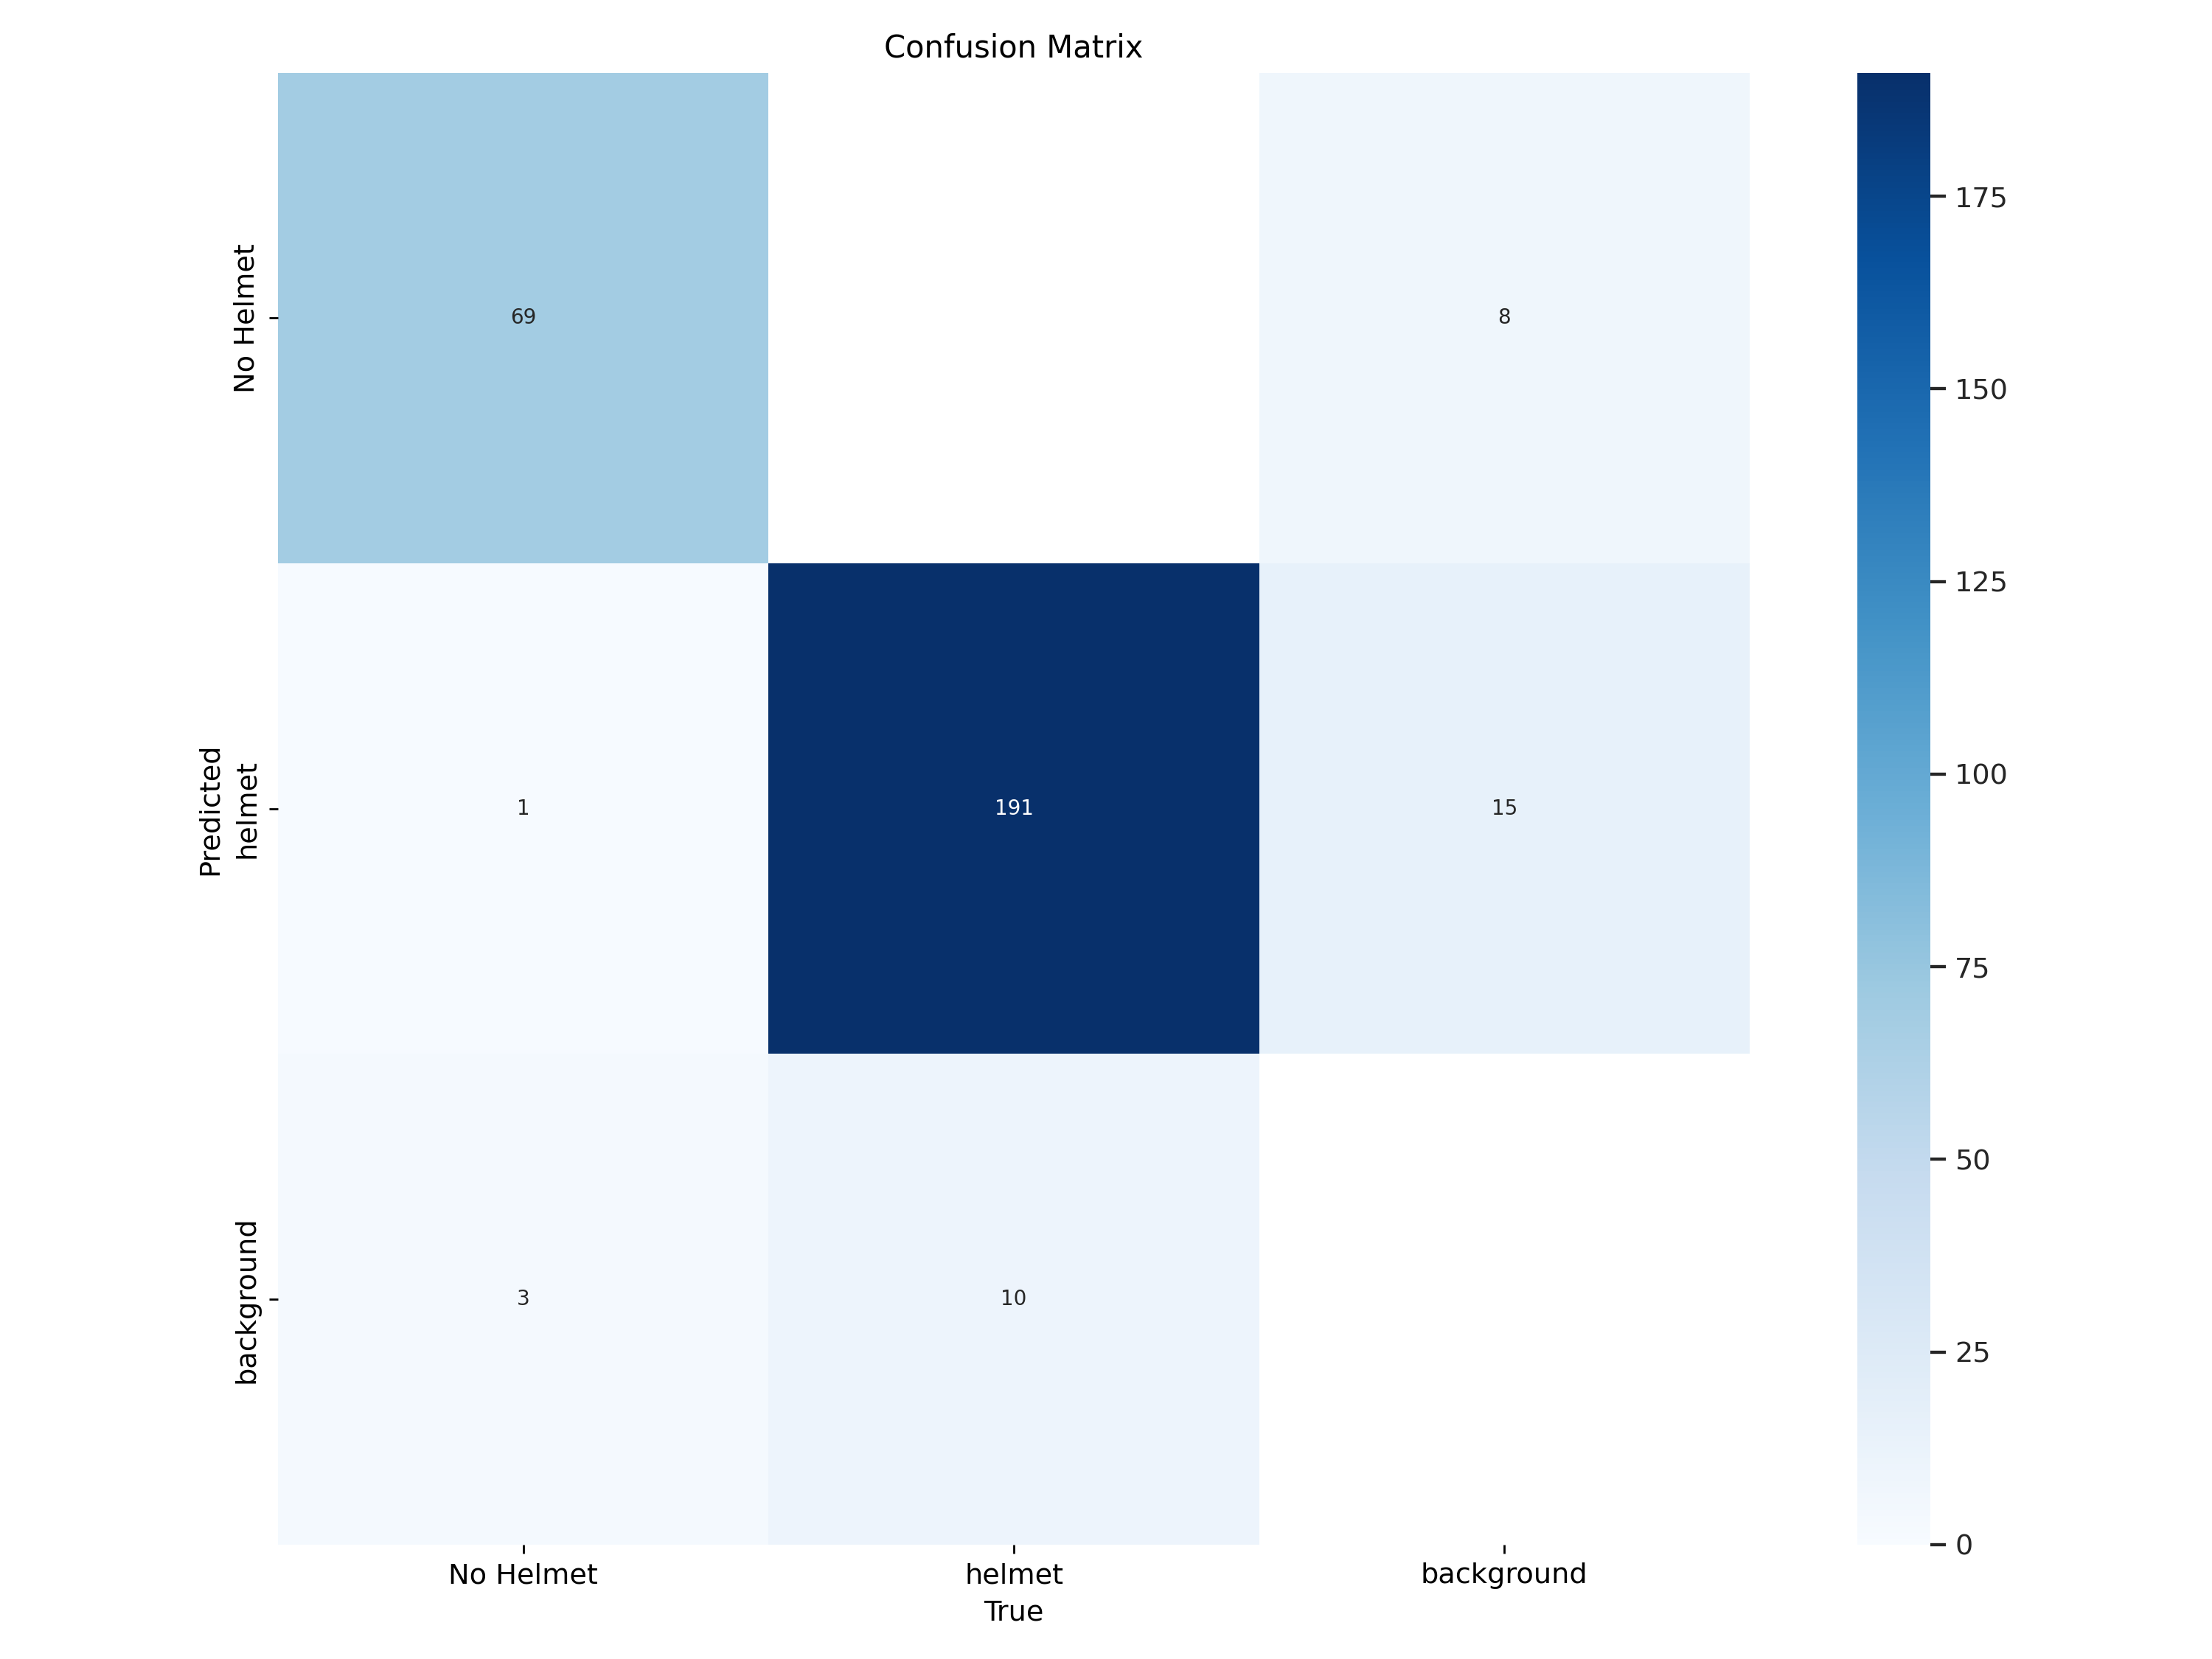

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

Number of different levels in the data:



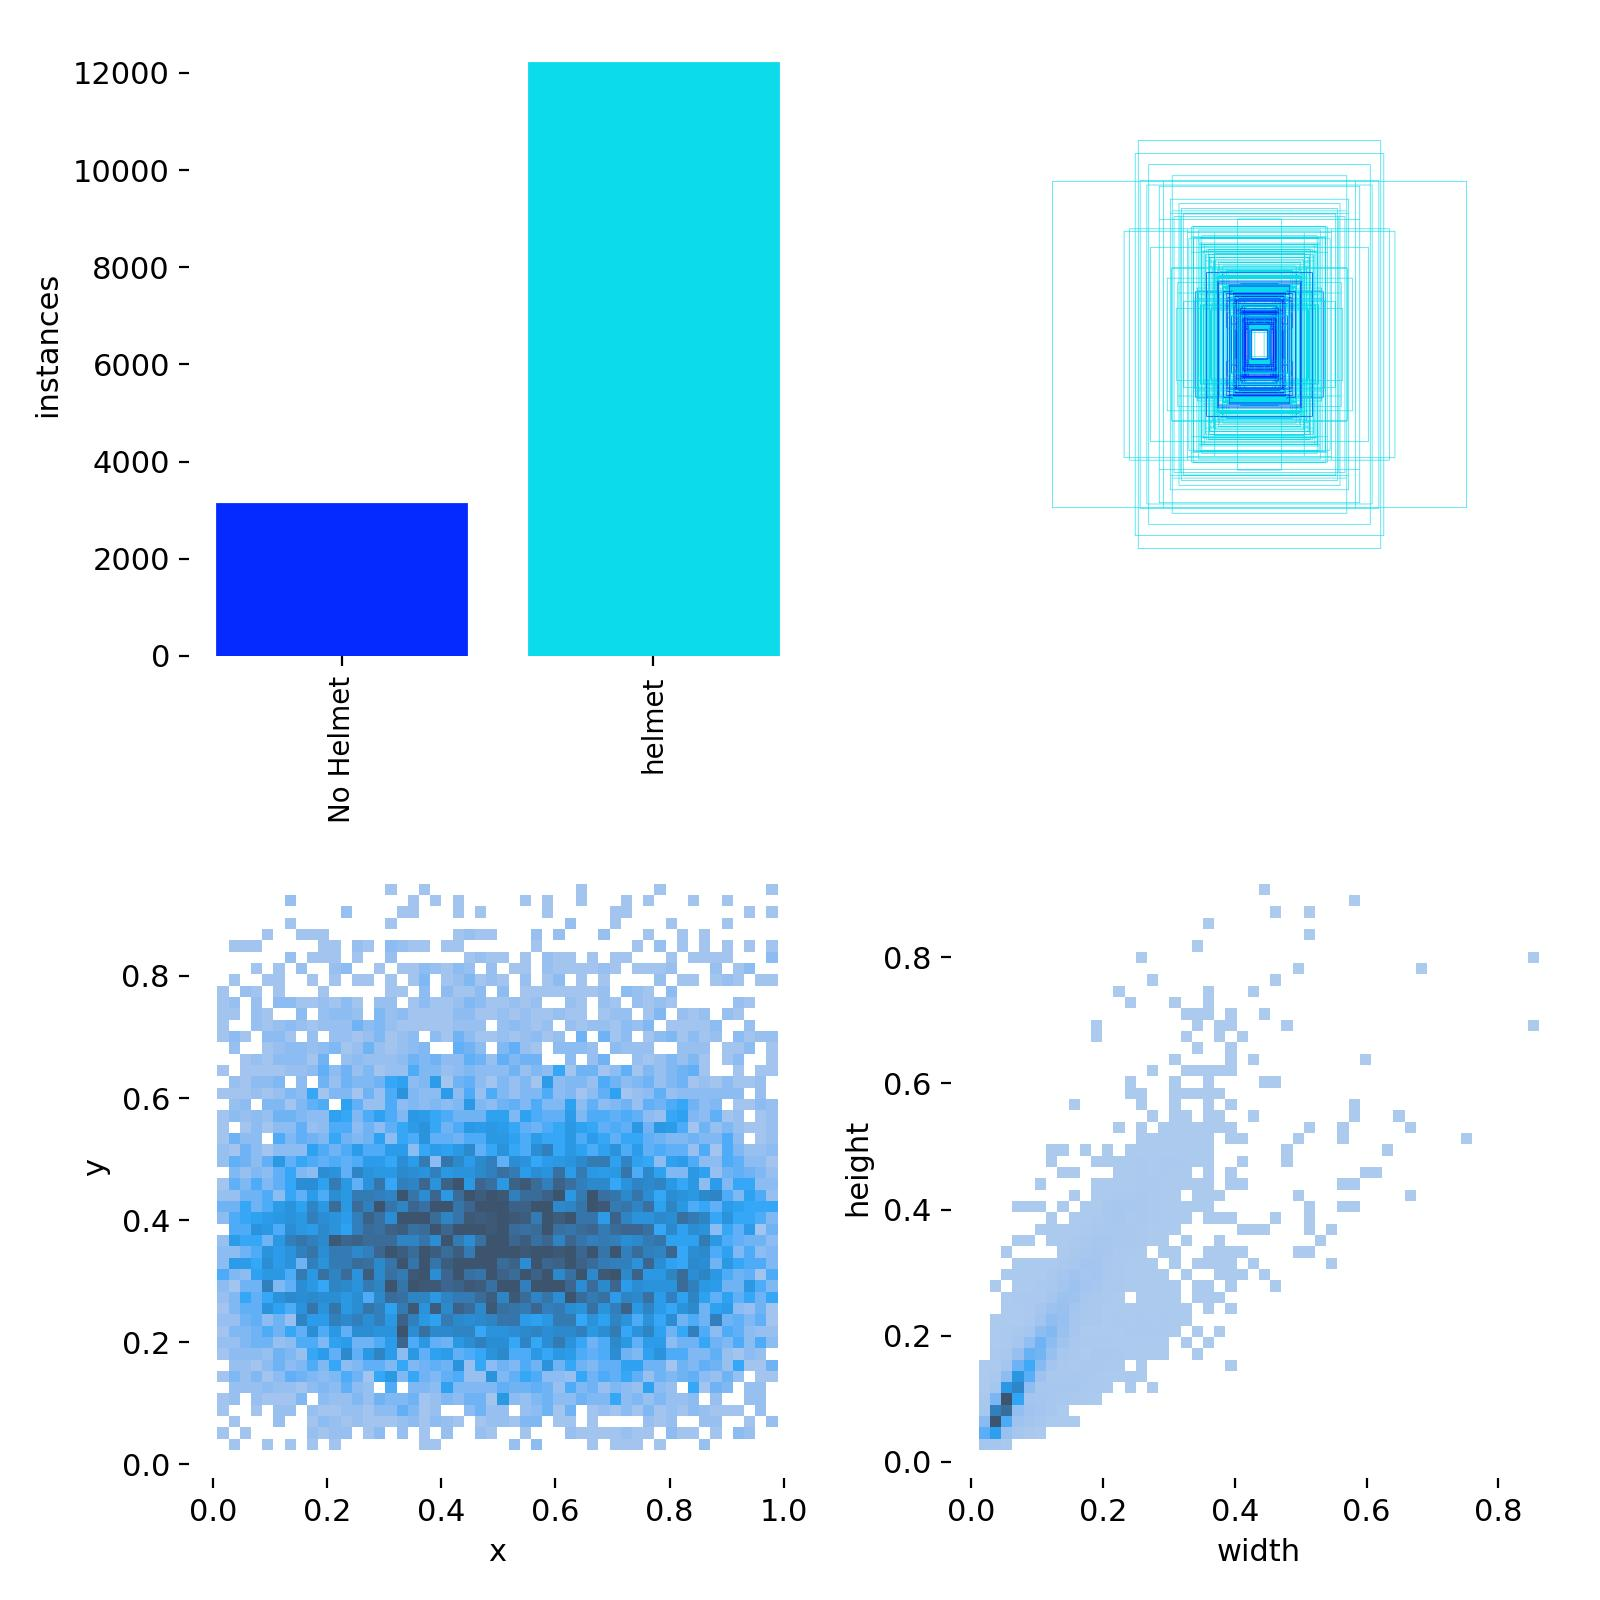

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

Learning curves: Loss and Accuracy pre epox


loss is decreasing and accuracy is increasing, meaning the model is learning better

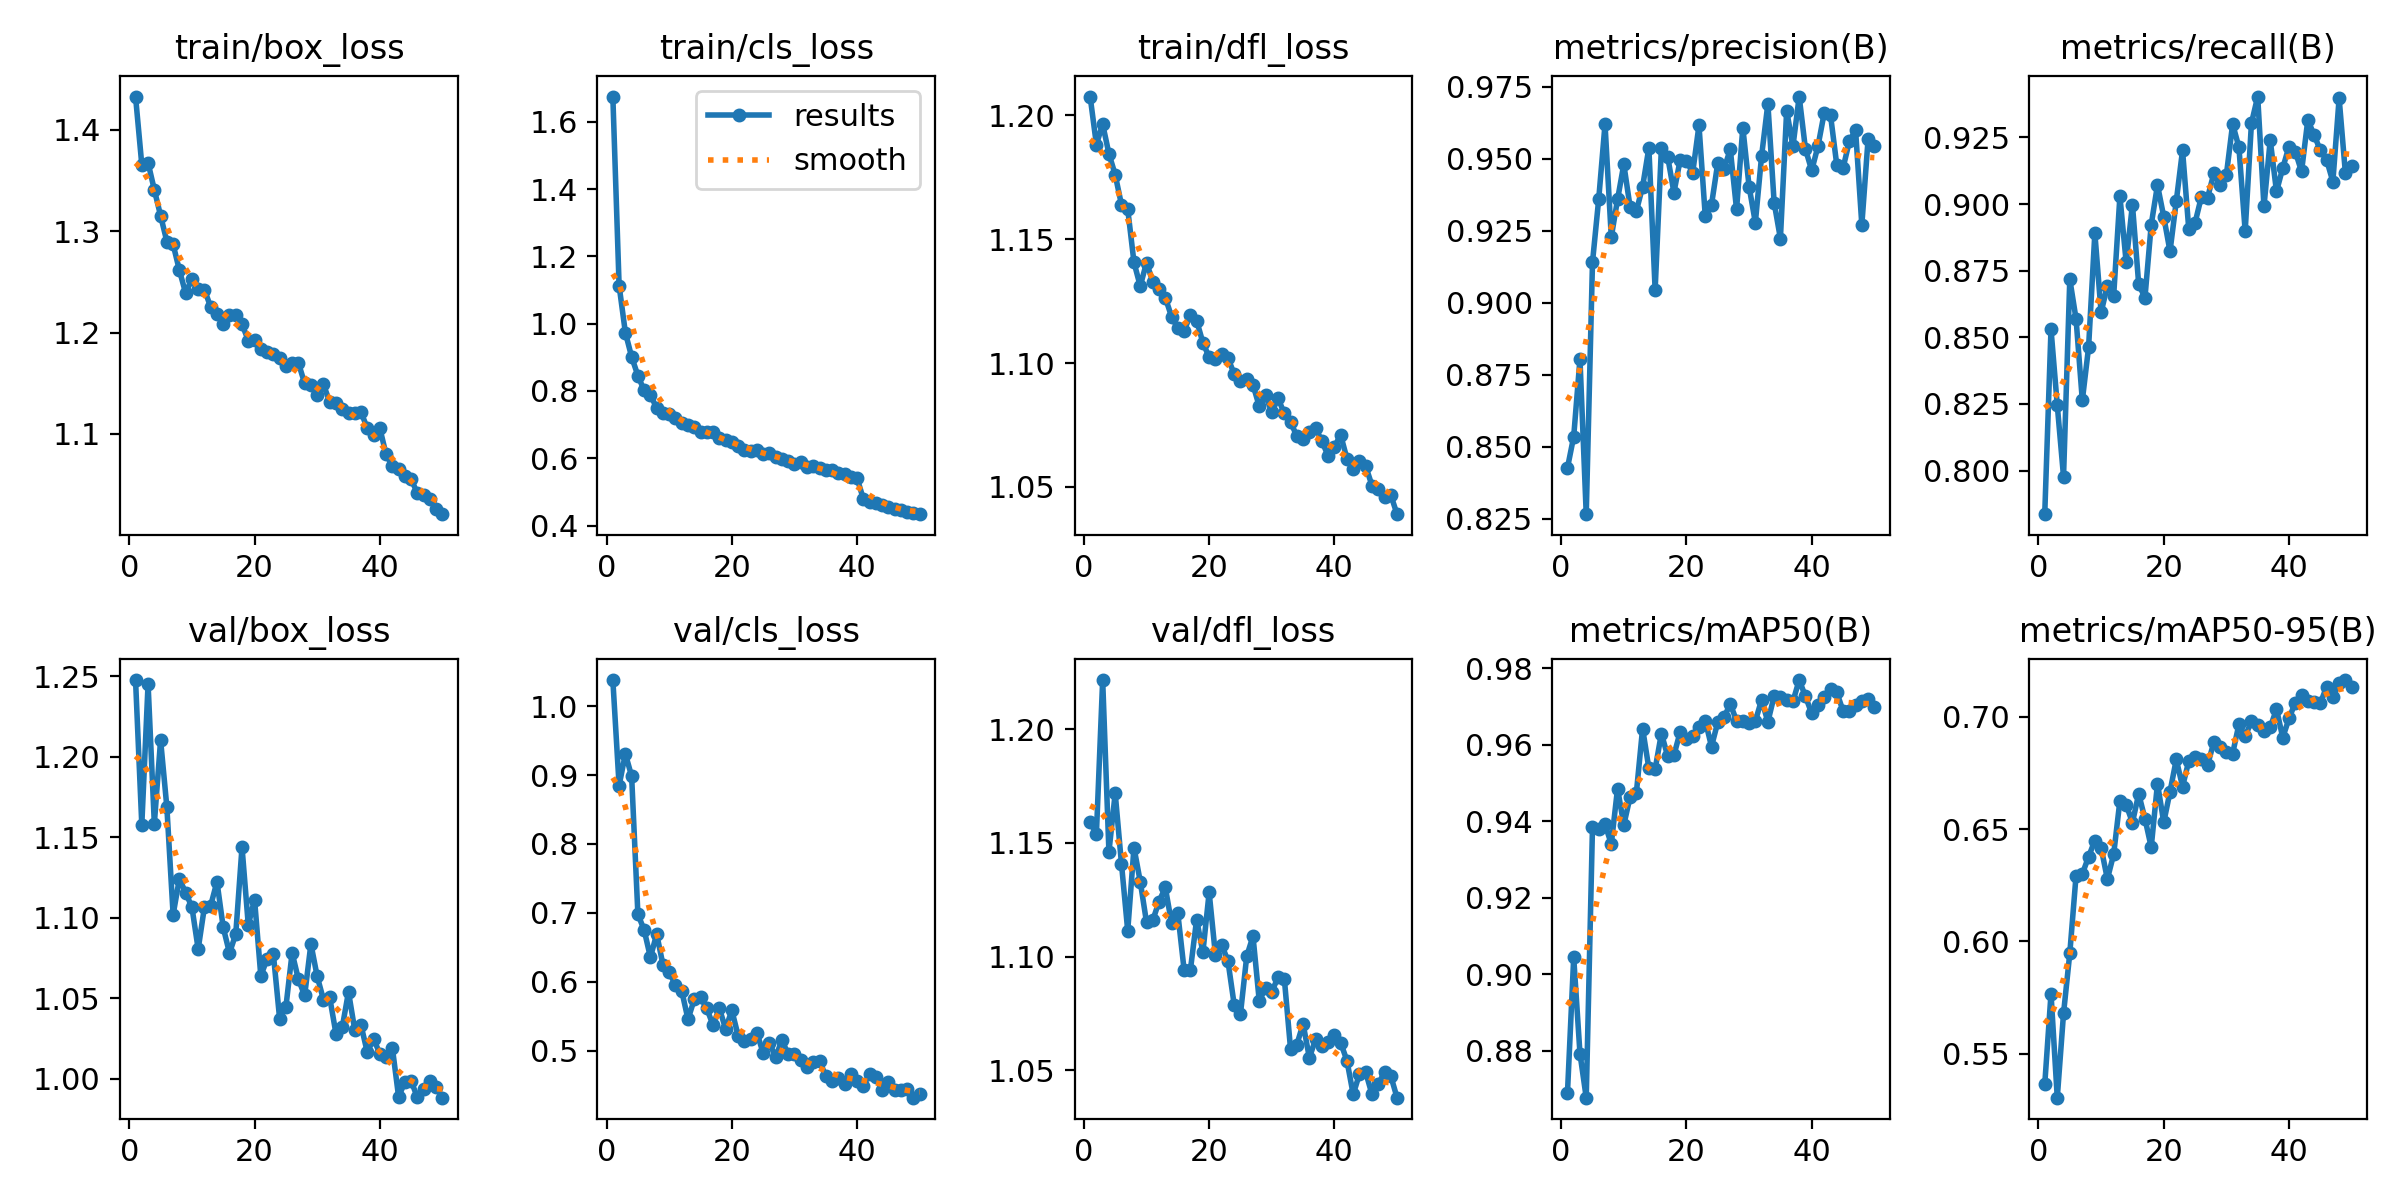

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

batch images:

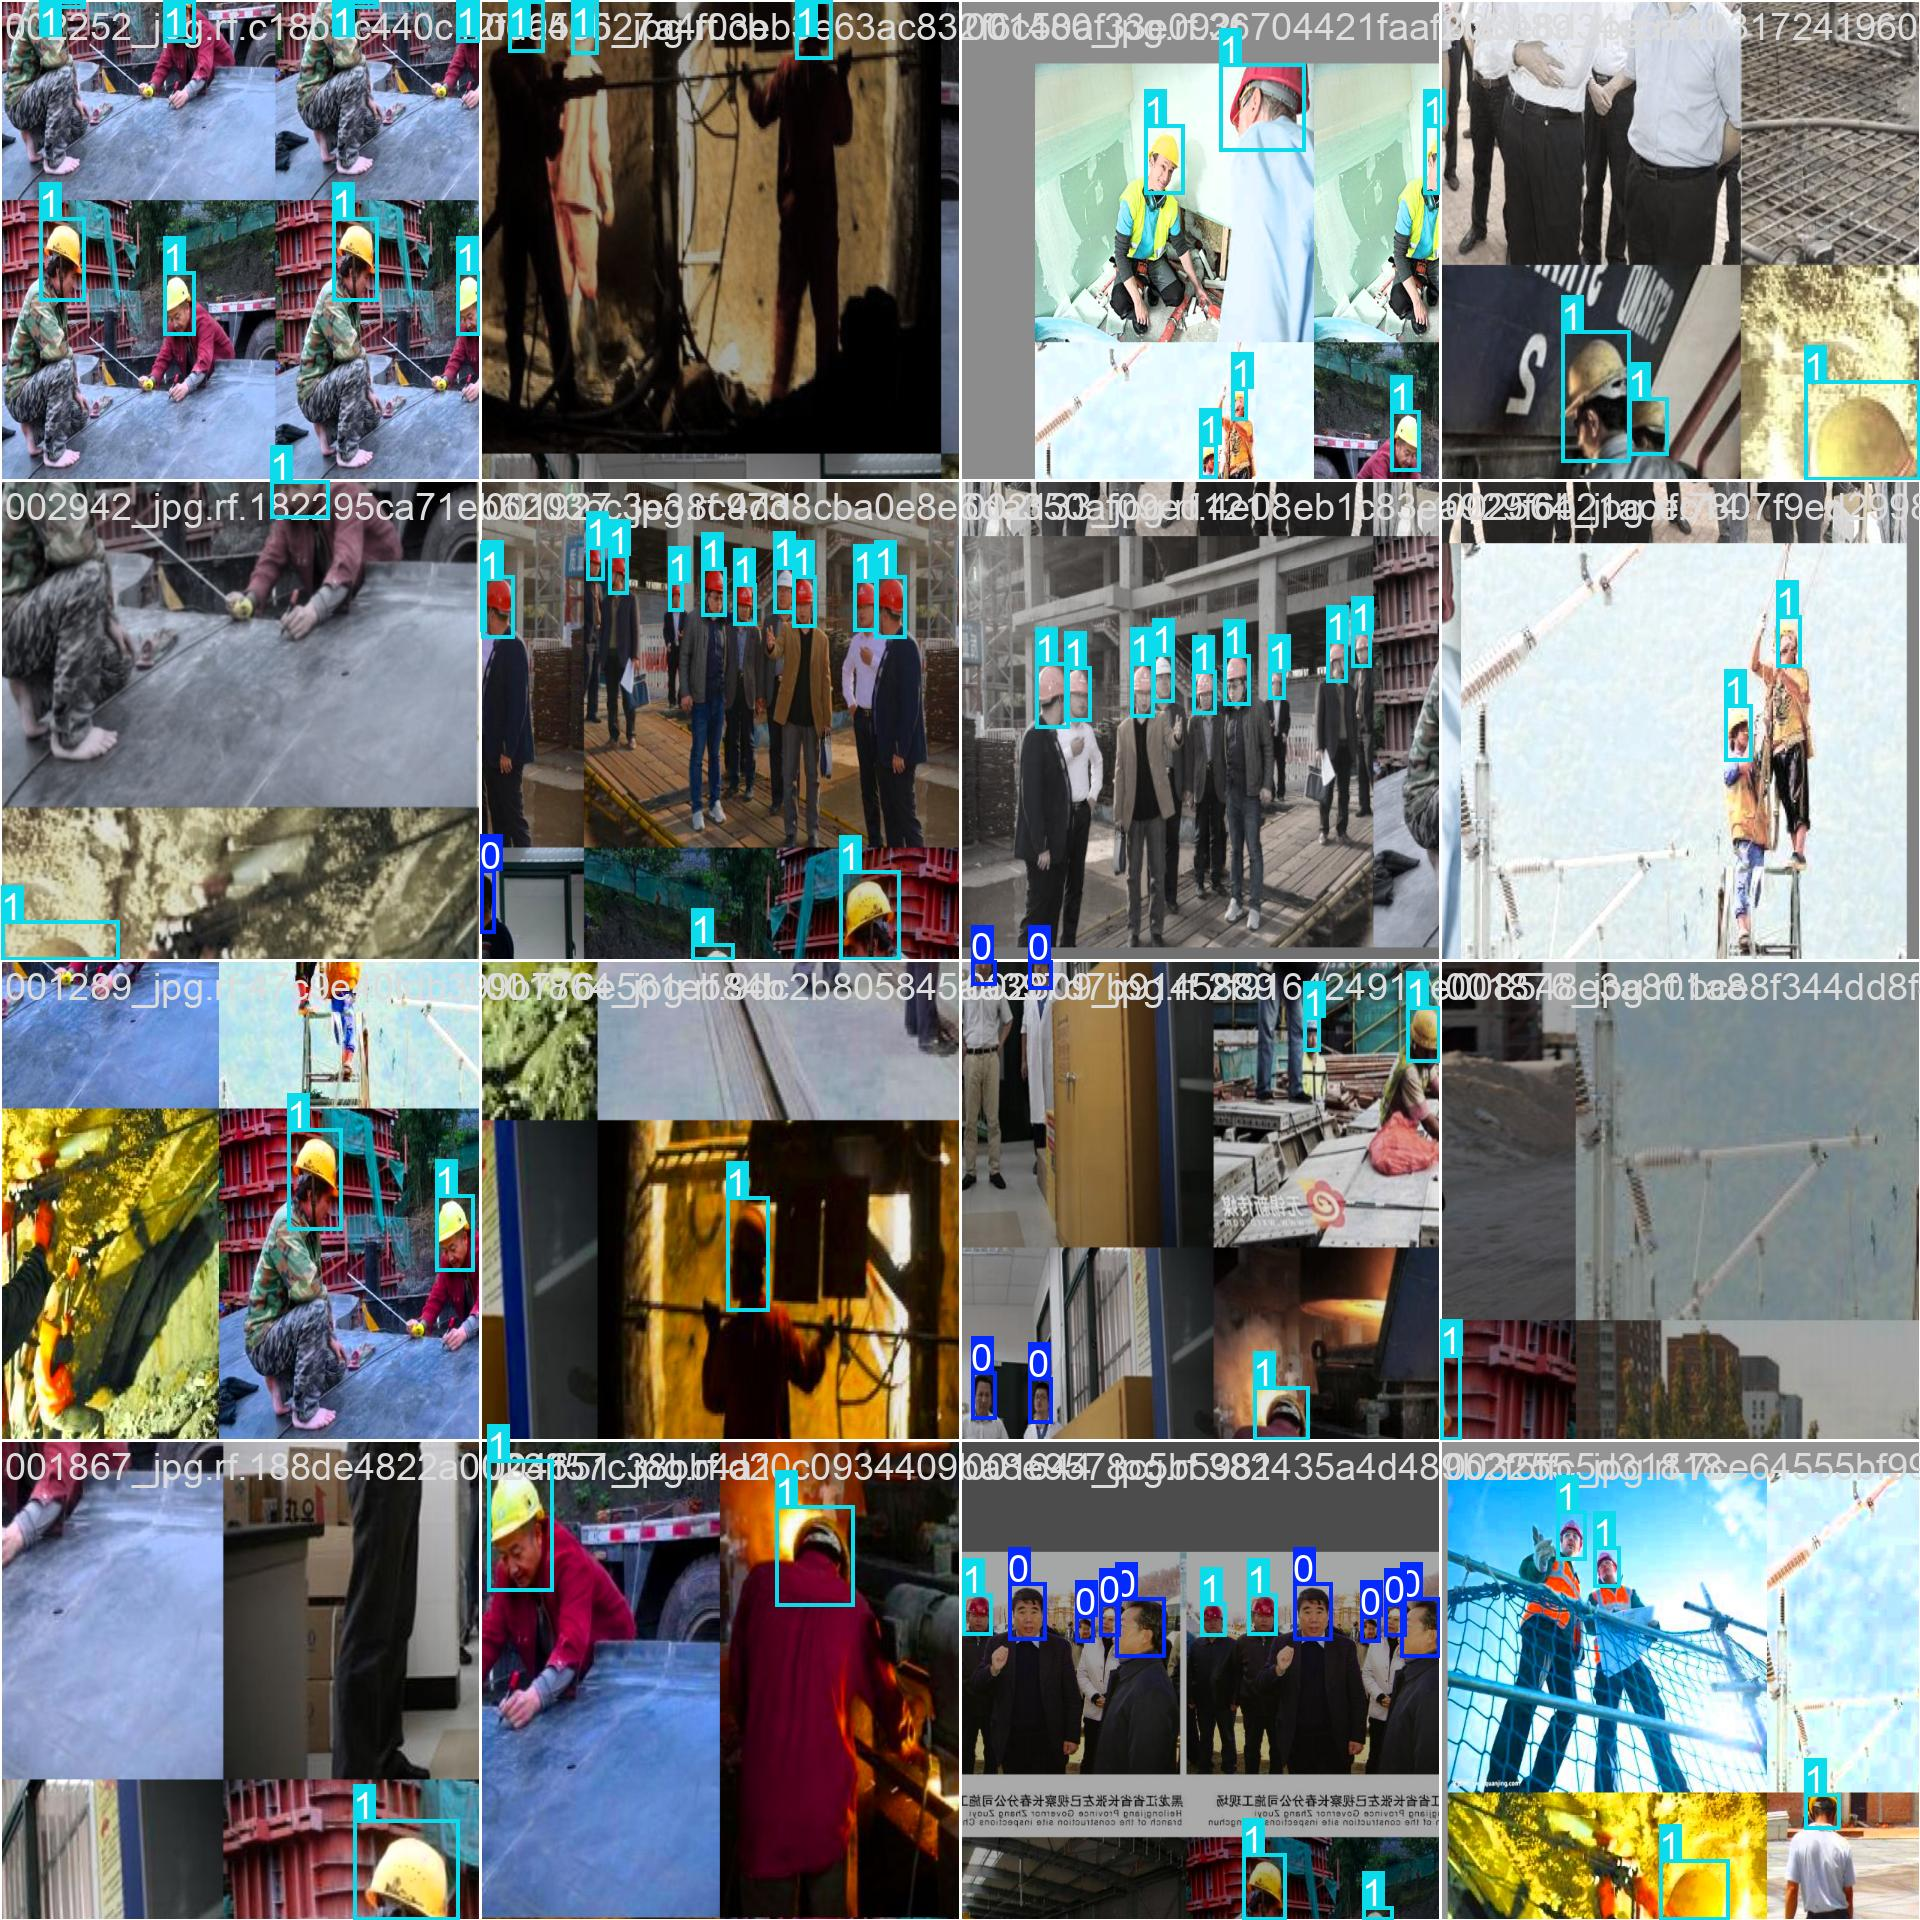

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

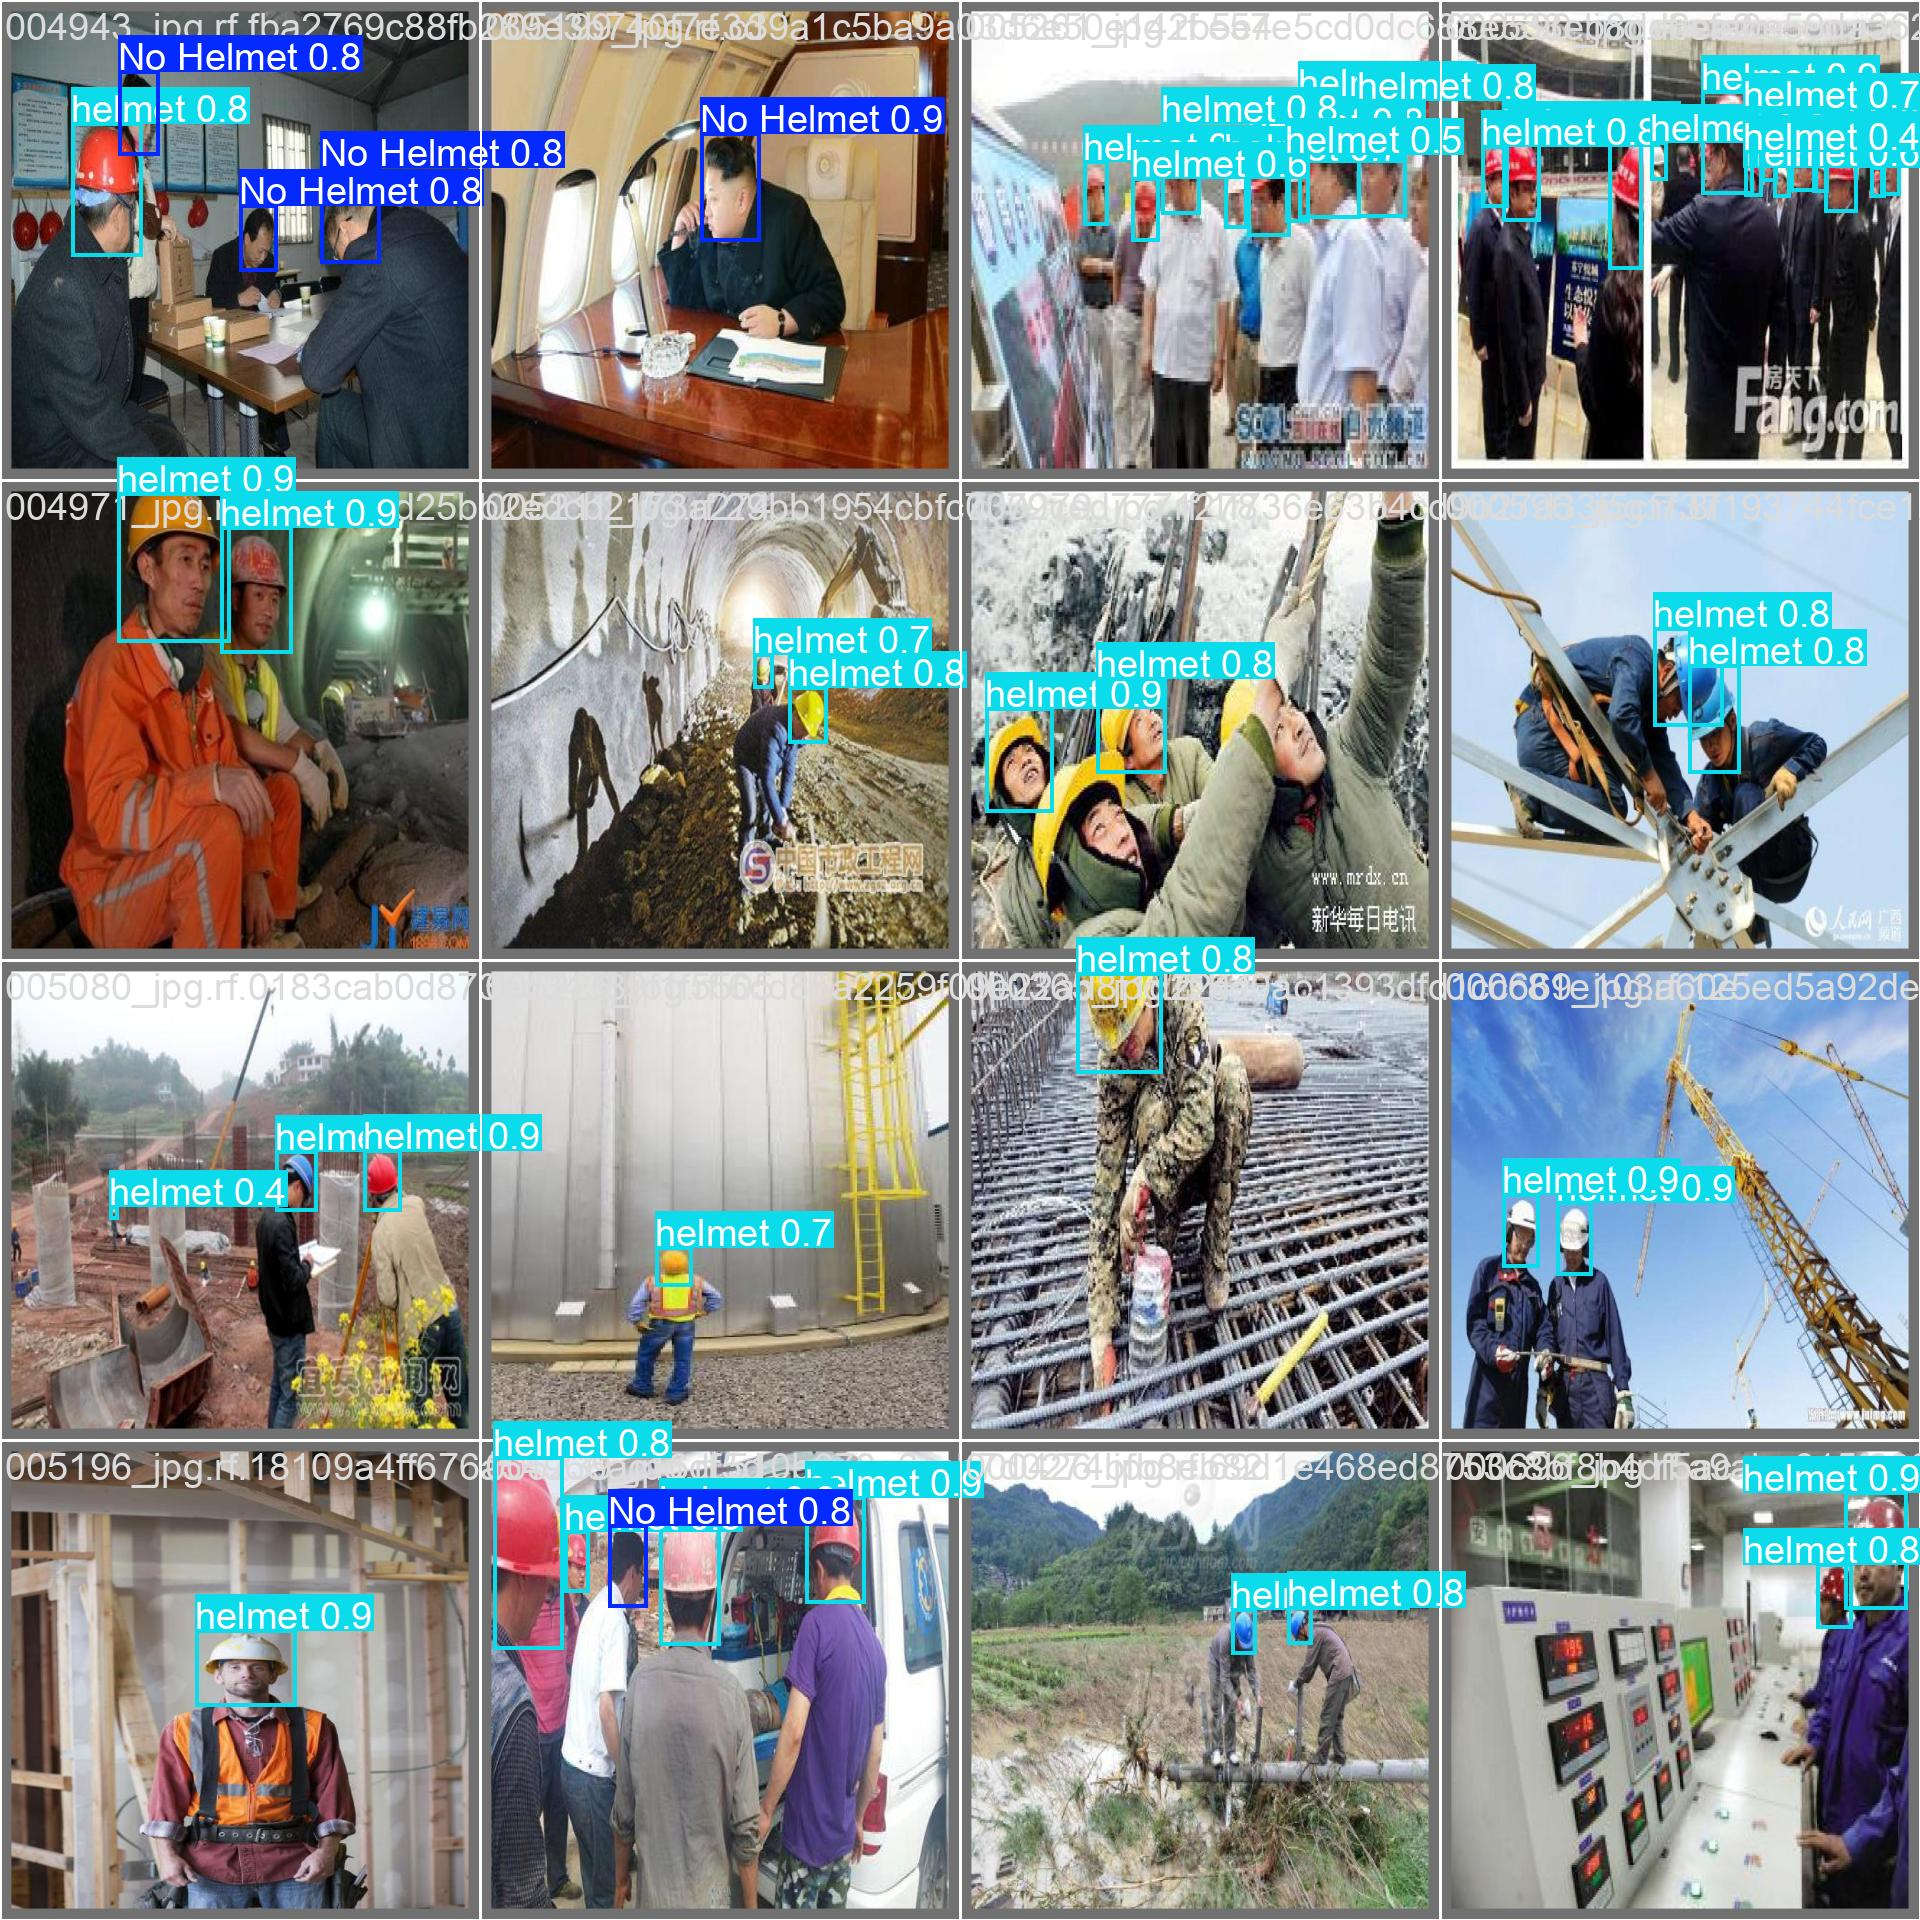

In [12]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

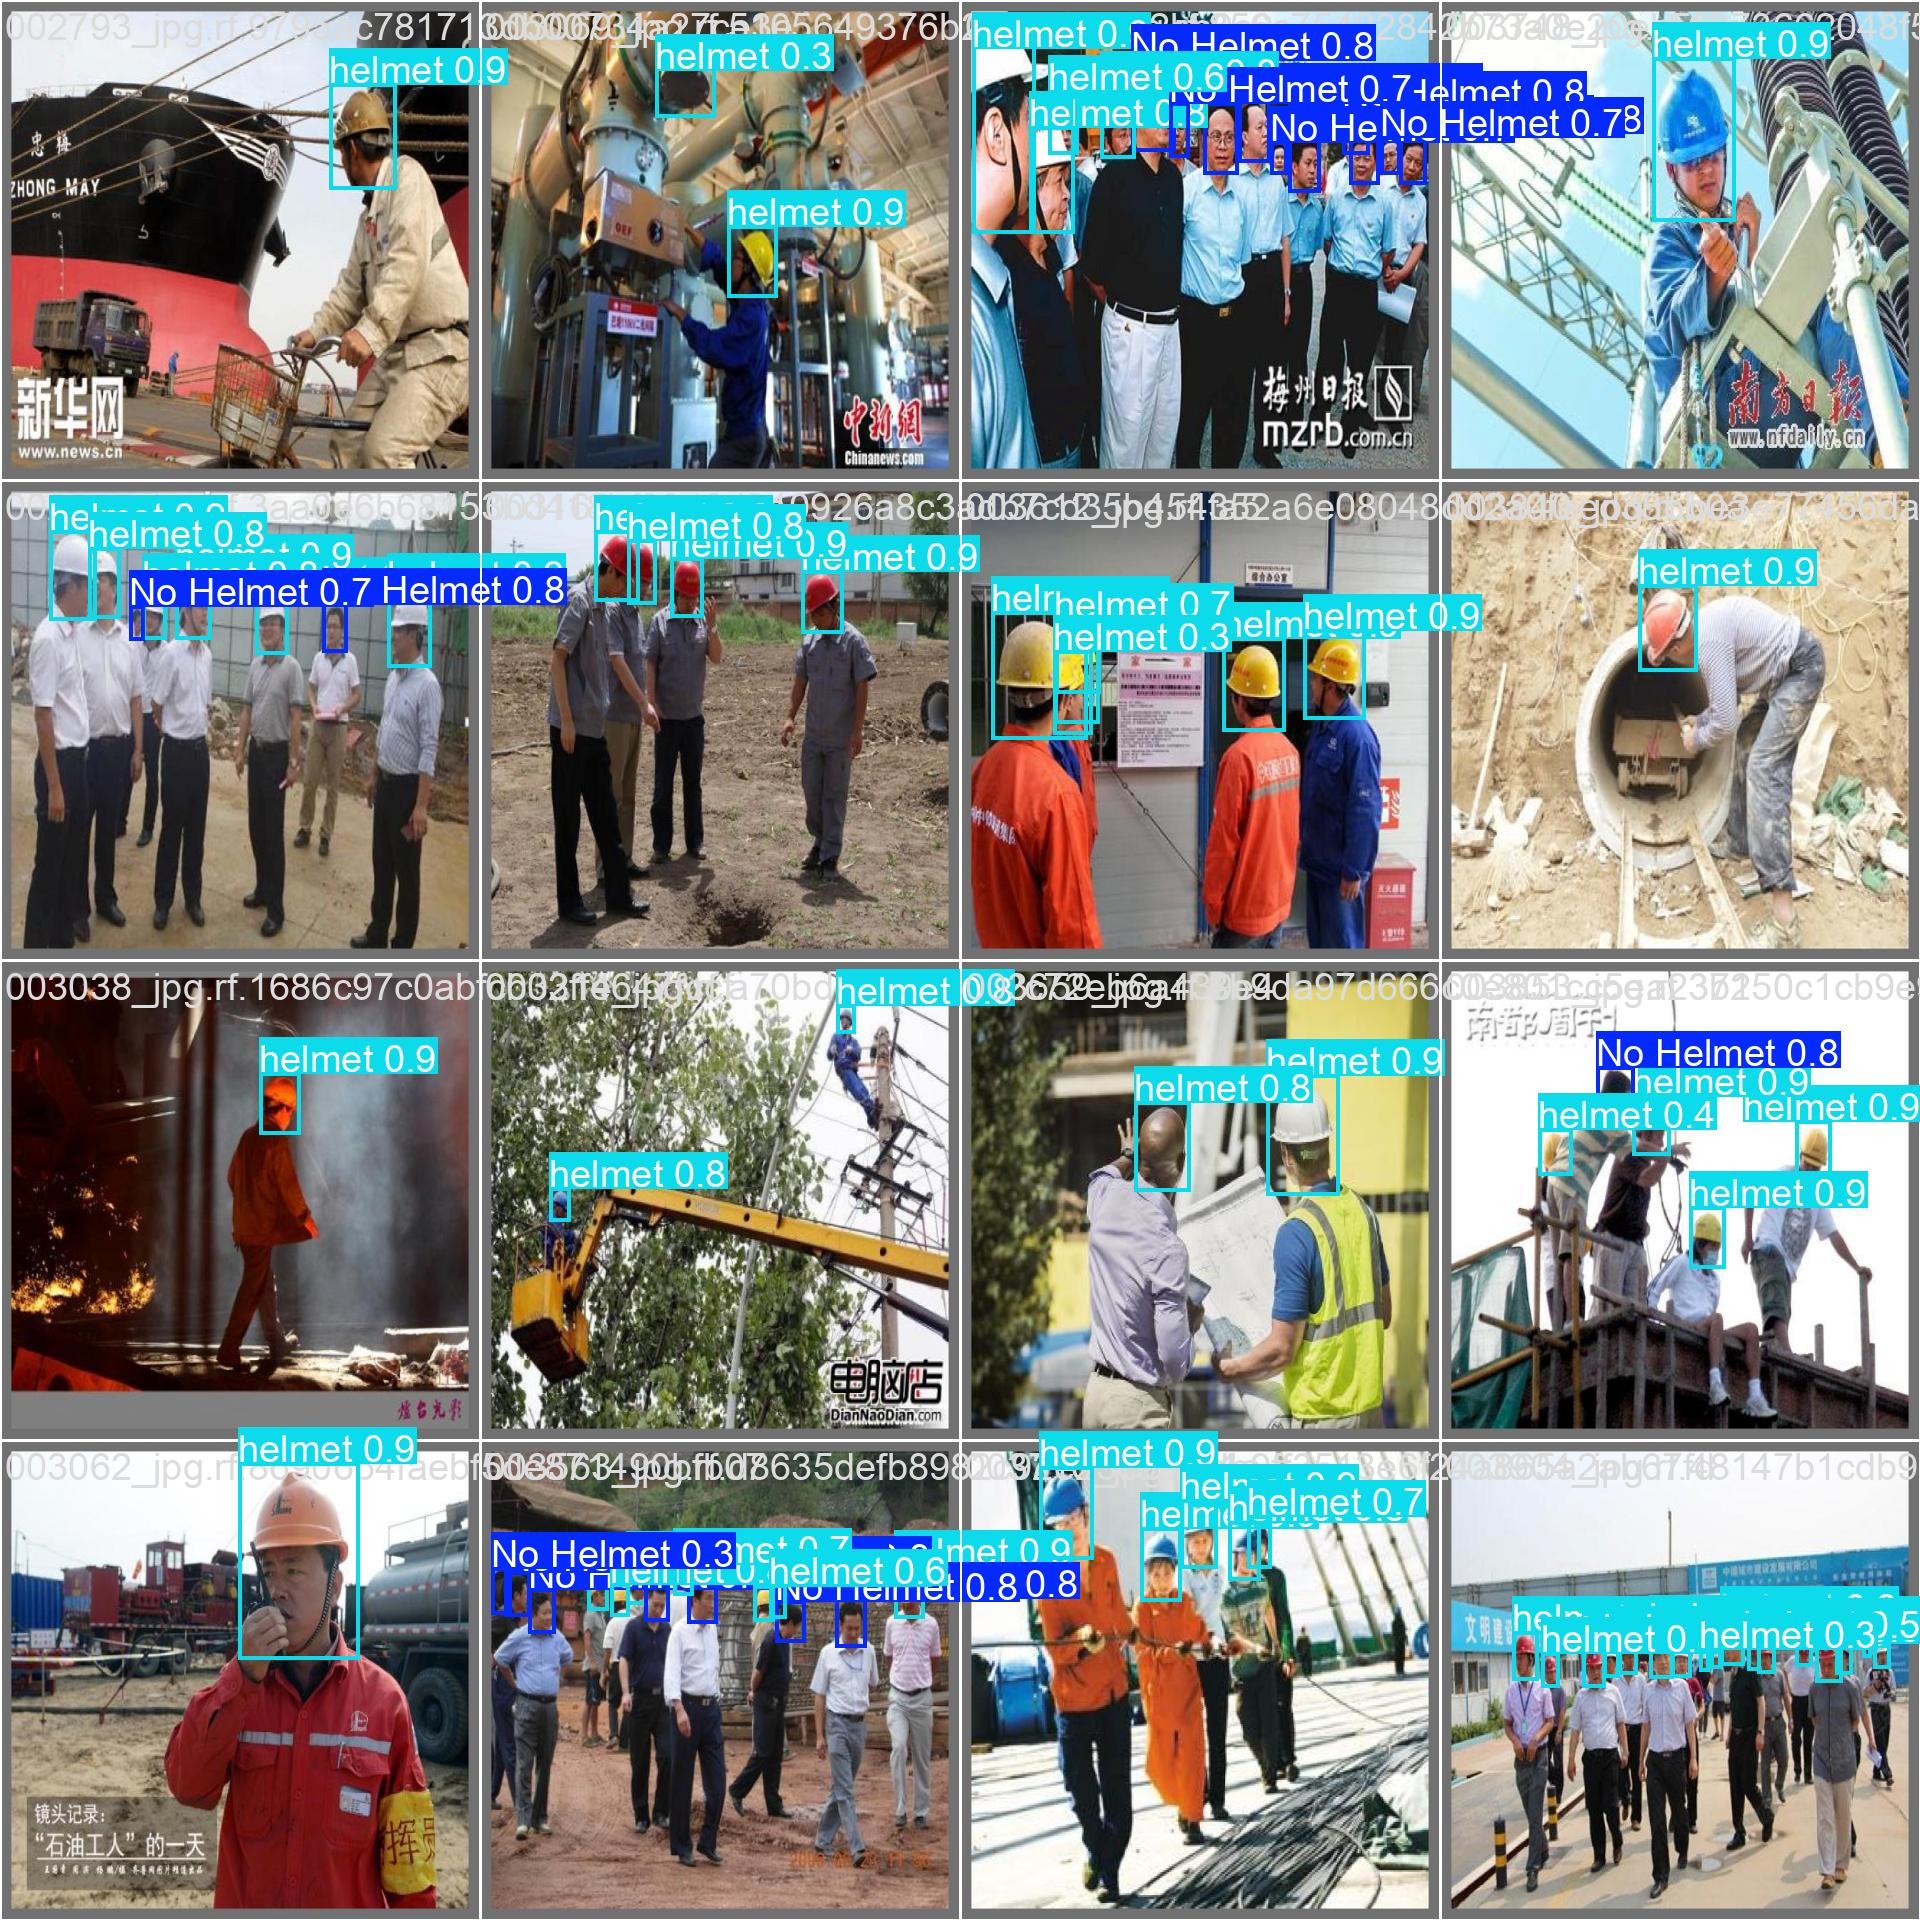

In [13]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Inference with Custom Model on Images**

test image predictions

In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/2292 /content/hard-hat-worker-detection-4/test/images/000001_jpg.rf.859bd36ea2393926625256ed2ad25d56.jpg: 640x640 2 helmets, 11.6ms
image 2/2292 /content/hard-hat-worker-detection-4/test/images/000002_jpg.rf.589324074abc4aa75d26f576e0e54756.jpg: 640x640 2 helmets, 10.1ms
image 3/2292 /content/hard-hat-worker-detection-4/test/images/000013_jpg.rf.1e05f0fd35cd2a02f7ed76add05346f7.jpg: 640x640 1 helmet, 9.2ms
image 4/2292 /content/hard-hat-worker-detection-4/test/images/000023_jpg.rf.6fcda05ec1764291cb8c7ed490a7d011.jpg: 640x640 15 No Helmets, 1 helmet, 8.9ms
image 5/2292 /content/hard-hat-worker-detection-4/test/images/000027_jpg.rf.7d7cd5f5e835cf95fff12a78fb30ae5e.jpg: 640x640 6 helmets, 9.4ms
image 6/2292 /content/hard-hat-worker-detection-4/test/images/000029_jpg.rf.88c16a271fe056fdc7fb16c14d814ea3.jp

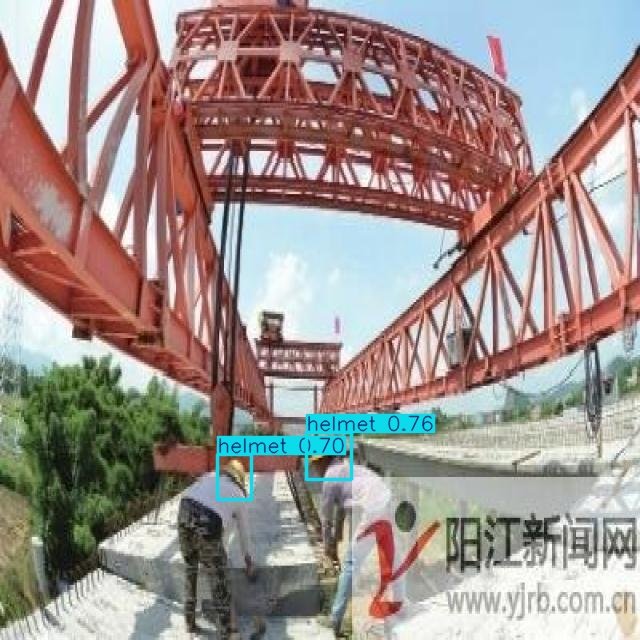

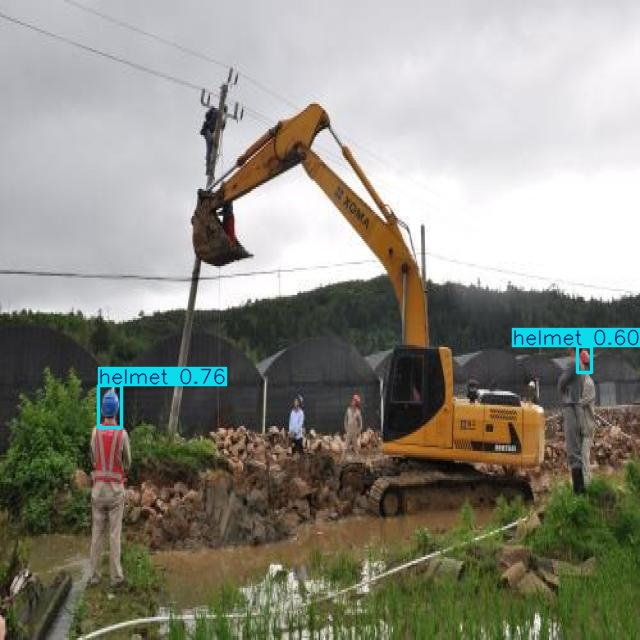

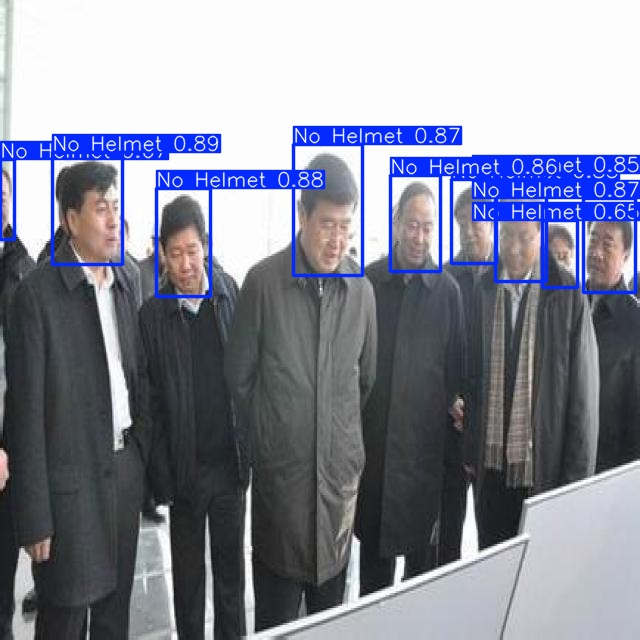

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

testing to see if model works on input image:

In [16]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmetProject_test_image.jpg save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmetProject_test_image.jpg: 384x640 1 No Helmet, 2 helmets, 56.8ms
Speed: 7.0ms preprocess, 56.8ms inference, 802.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


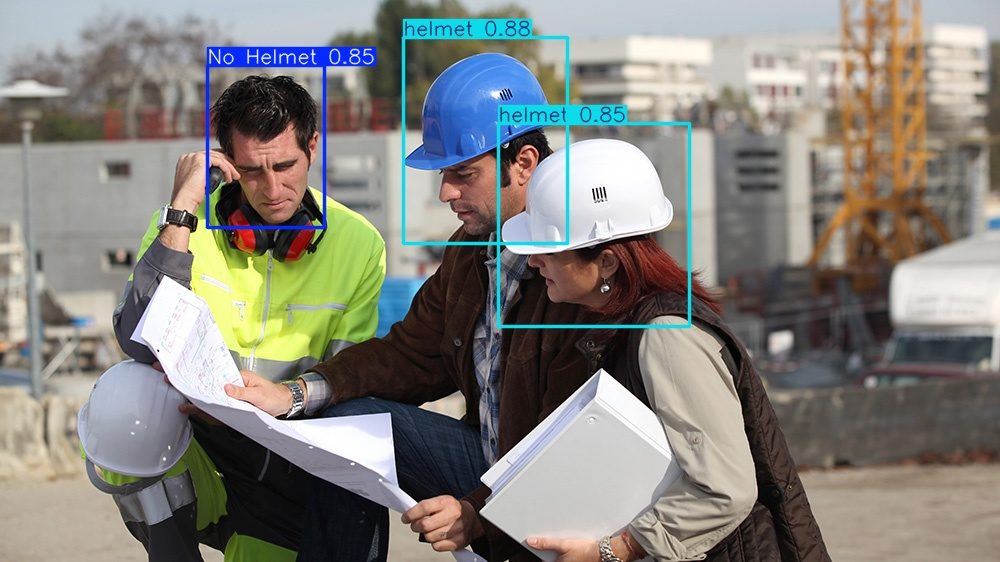

In [18]:
Image("/content/runs/detect/predict2/helmetProject_test_image.jpg", width=600)